<a href="https://colab.research.google.com/github/cmiguelsv/Credit_Card_Prediction/blob/main/CreditCardPred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
# Importing datasets from google drive
```



In [ ]:
# For data processing
import pandas as pd
import numpy as np

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pd.set_option('display.max_columns', None)                  #para poder visualizar todas as colunas no display
pd.set_option('display.width', 1000)

In [ ]:
#application record dataset
app = pd.read_csv('/content/application_record.csv')

In [ ]:
#credit record dataset
cred = pd.read_csv('/content/credit_record.csv')

In [ ]:
#Visualizing the first 5 rows
app.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [ ]:
#Visualizing the first 5 rows
cred.head(20)

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
5,5001712,-1,C
6,5001712,-2,C
7,5001712,-3,C
8,5001712,-4,C
9,5001712,-5,C


In [ ]:
#Checking nulls or missing values
cred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [ ]:
#Checking nulls or missing values
app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [ ]:
#Checking nulls
cred.isnull().sum()

ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

In [ ]:
#Checking nulls
app.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

In [ ]:
# since the status 1 is already in debt we are adding 1 to each number, so C and X (debt free) can have the value 0
cred['STATUS'].replace({'0' : 1, '1':2, '2':3, '3':4, '4':5, '5':6}, inplace=True)
cred['STATUS']=cred['STATUS']

In [ ]:
# replacing C and X
cred['STATUS'].replace({'C': 0, 'X' : 0}, inplace=True)
cred['STATUS']=cred['STATUS'].astype(int)

In [ ]:
cred= cred.groupby('ID')['STATUS'].max()

In [ ]:
#merging the 2 datasets
df_merged = app.merge(cred, how='inner', on=['ID'])
df_merged

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,2
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,2
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,1
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,1
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,-17348,-2420,1,0,0,0,Managers,2.0,6
36453,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0,6
36454,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0,6
36455,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,-17958,-655,1,0,0,0,Sales staff,2.0,3


In [ ]:
#Rename columns
df_renamed = df_merged.rename(columns={'CODE_GENDER':'gender','FLAG_OWN_CAR':'car','FLAG_OWN_REALTY':'owns_a_property',
                         'CNT_CHILDREN':'number_of_children','AMT_INCOME_TOTAL':'annual_income',
                         'NAME_EDUCATION_TYPE':'education_type','NAME_FAMILY_STATUS':'maritial_status',
                        'NAME_HOUSING_TYPE':'housing_type','FLAG_EMAIL':'email',
                         'NAME_INCOME_TYPE':'income_category','FLAG_WORK_PHONE':'work_phone',
                         'phone':'house_phone','CNT_FAM_MEMBERS':'family_size',
                        'OCCUPATION_TYPE':'occupation_type' , 'STATUS':'status' , 'DAYS_BIRTH':'days_since_birth',
                        'DAYS_EMPLOYED': 'days_employed', 'FLAG_MOBIL': 'mobil_phone' , 'FLAG_PHONE': 'house_phone'
                         },inplace= False )

#Data Manipulation


In [ ]:
#Creating a new column with the target

classification = {0: 'low risk client', 1:'mid risk client', 2: 'high risk client', 3: 'high risk client', 4: 'high risk client', 5: 'high risk client', 6: 'high risk client'}
df_renamed['classification'] = df_renamed['status'].apply(lambda x: classification[x])

In [ ]:
#drop columns ID, house phone and status - not relevant
df = df_renamed.drop(  ['ID', 'house_phone' , 'status'], axis=1,   inplace = False)

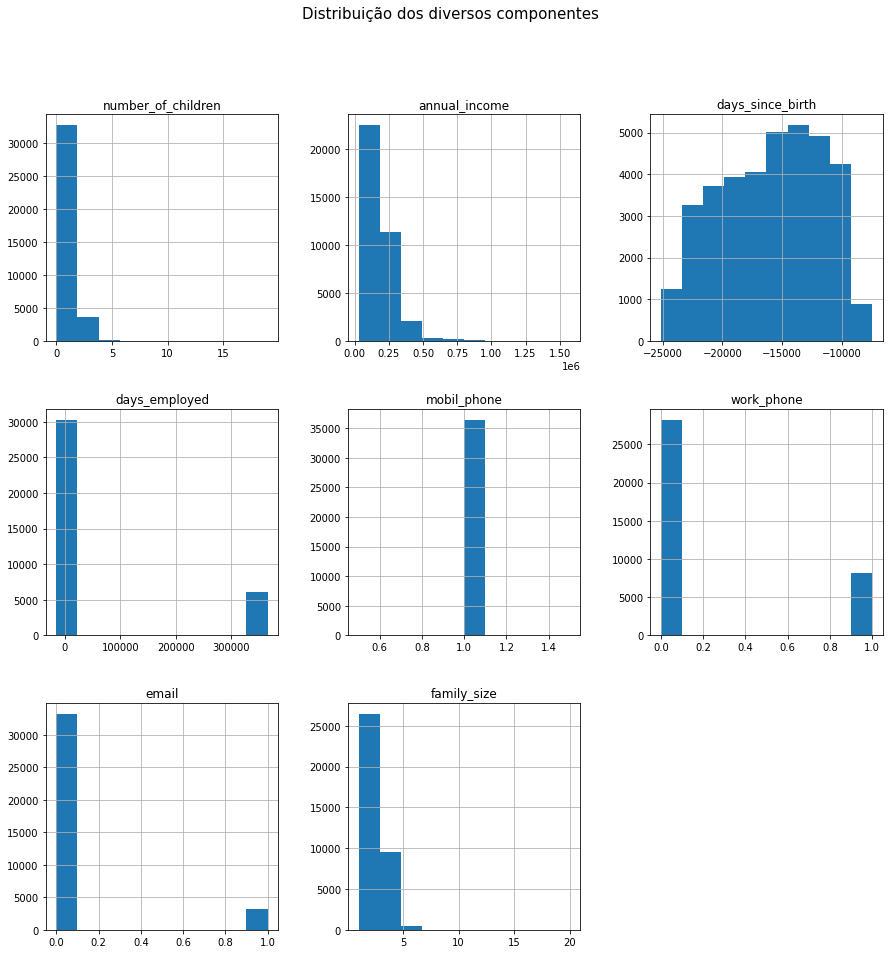

In [ ]:
#Checking some distributions
df.hist(figsize=(15, 15))
plt.suptitle('Distribuição dos diversos componentes', fontsize=15)
plt.show()

In [ ]:
#cheking the values for target
df['classification'].value_counts(dropna=False)

mid risk client     27711
low risk client      4455
high risk client     4291
Name: classification, dtype: int64

In [ ]:
df.head(10)

,gender,car,owns_a_property,number_of_children,annual_income,income_category,education_type,maritial_status,housing_type,days_since_birth,days_employed,mobil_phone,work_phone,email,occupation_type,family_size,classification
0,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,NaN,2.0,high risk client
1,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,NaN,2.0,high risk client
2,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,Security staff,2.0,mid risk client
3,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,Sales staff,1.0,mid risk client
4,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,Sales staff,1.0,low risk client
5,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,Sales staff,1.0,mid risk client
6,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,Sales staff,1.0,mid risk client
7,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,NaN,1.0,mid risk client
8,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,NaN,1.0,mid risk client
9,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,NaN,1.0,mid risk client


In [ ]:
#replacing na by other. this only applies to occupation type column
df[['occupation_type']] = df[['occupation_type']].fillna('Other')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 0 to 36456
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              36457 non-null  object 
 1   car                 36457 non-null  object 
 2   owns_a_property     36457 non-null  object 
 3   number_of_children  36457 non-null  int64  
 4   annual_income       36457 non-null  float64
 5   income_category     36457 non-null  object 
 6   education_type      36457 non-null  object 
 7   maritial_status     36457 non-null  object 
 8   housing_type        36457 non-null  object 
 9   days_since_birth    36457 non-null  int64  
 10  days_employed       36457 non-null  int64  
 11  mobil_phone         36457 non-null  int64  
 12  work_phone          36457 non-null  int64  
 13  email               36457 non-null  int64  
 14  occupation_type     36457 non-null  object 
 15  family_size         36457 non-null  float64
 16  clas

##Age

In [ ]:
#We want to make sure that customer without 18 years old do not have a credit card approval
#https://www.forbes.com/advisor/credit-cards/how-old-do-you-have-to-be-to-get-a-credit-card/ acording with this source the minimun age is 18
#The legal age for someone to sign up for his or her own credit card is 18 years old in the U.S.
#Function to calculate birth date from days
def birth_date(days):
  today = date.today()
  birthday = (today + timedelta(days=days)).strftime('%Y-%m-%d')
  return birthday

In [ ]:
import datetime
from datetime import date

def calculate_age(bdate):
    bdate = datetime.datetime.strptime(bdate, '%Y-%m-%d')
    today = date.today()
    return today.year - bdate.year - ((today.month, today.day) < (bdate.month, bdate.day))

In [ ]:
from datetime import date,timedelta
#get the day of birth for each person
df['days_since_birth'] = df['days_since_birth'].apply(birth_date)
#get age
df['age'] = df['days_since_birth'].apply(calculate_age)

In [ ]:
#no client younger than 20
df['age'].value_counts(dropna=False, sort=False)

32    1044
58     722
52     722
61     536
46     910
48     857
29     944
27    1125
30     990
34    1045
56     792
43     992
44     940
45     774
33    1052
55     674
42    1030
37    1210
28    1123
57     837
51     900
54     859
39    1092
24     386
20       1
38    1058
40    1152
36     959
35    1020
41    1016
59     844
26     527
50     844
53     770
62     640
60     780
63     567
25     475
22     152
23     209
64     520
47     890
31     962
49     758
65     339
21      10
66     252
67     130
68      26
Name: age, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 0 to 36456
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              36457 non-null  object 
 1   car                 36457 non-null  object 
 2   owns_a_property     36457 non-null  object 
 3   number_of_children  36457 non-null  int64  
 4   annual_income       36457 non-null  float64
 5   income_category     36457 non-null  object 
 6   education_type      36457 non-null  object 
 7   maritial_status     36457 non-null  object 
 8   housing_type        36457 non-null  object 
 9   days_since_birth    36457 non-null  object 
 10  days_employed       36457 non-null  int64  
 11  mobil_phone         36457 non-null  int64  
 12  work_phone          36457 non-null  int64  
 13  email               36457 non-null  int64  
 14  occupation_type     36457 non-null  object 
 15  family_size         36457 non-null  float64
 16  clas

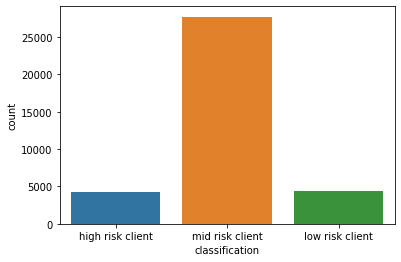

In [ ]:
#Counting classification
sns.countplot(x='classification', data=df)

<Figure size 1080x576 with 0 Axes>

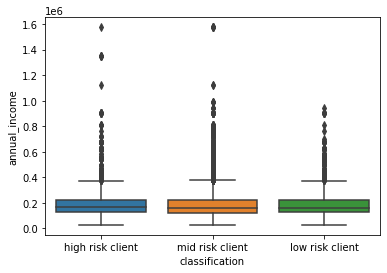

<Figure size 1080x576 with 0 Axes>

In [ ]:
#Viz annual income per classification
sns.boxplot( x=df['classification'], y=df['annual_income']);
plt.figure(figsize=(15,8))

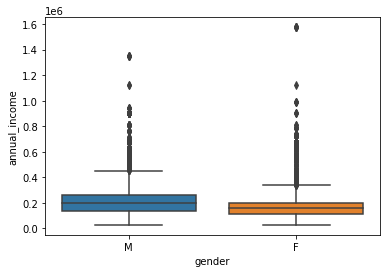

In [ ]:
#Viz annual income by gender
sns.boxplot( x=df['gender'], y=df['annual_income']);

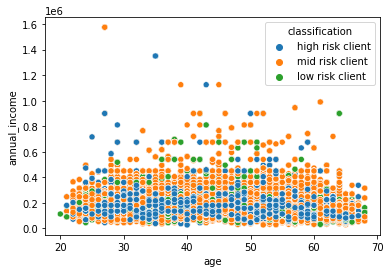

In [ ]:
#Scatter to check if there is any relation between classification, age and annual income
#The majority high risk clients seem to have an income below 0.4
sns.scatterplot(x="age",
                    y="annual_income",
                    hue="classification",
                    data=df)

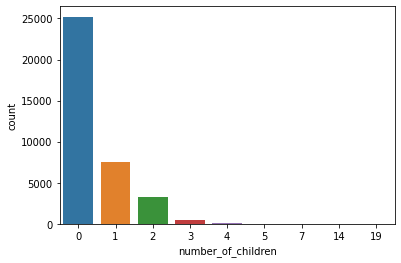

In [ ]:
#We found out two suspicious numbers
sns.countplot(x='number_of_children', data=df)

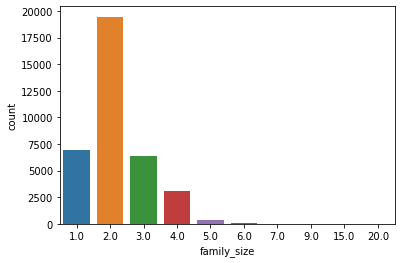

In [ ]:
#Lets check if these numbers are related with the family size
sns.countplot(x='family_size', data=df)

In [ ]:
#We found out an odd number of children (14 and 19). Although these numbers could be real, to avoid to influence the models that are outlier sensitives we decide to remove them.
#The same happens to the family size (it is related with the number of children).
df = df[(df.number_of_children != 19) & (df.number_of_children != 14)]
df = df[(df.family_size != 15) & (df.family_size != 20)]

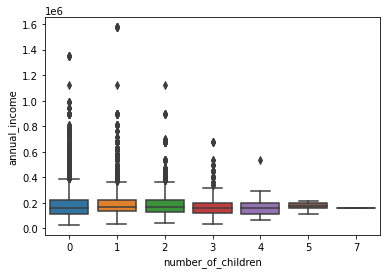

In [ ]:
#Viz number of children per anual income
sns.boxplot( x=df['number_of_children'], y=df['annual_income']);

In [ ]:
df.describe()

,number_of_children,annual_income,days_employed,mobil_phone,work_phone,email,family_size,age
count,36453.000000,3.645300e+04,36453.000000,36453.0,36453.000000,36453.000000,36453.000000,36453.000000
mean,0.428689,1.866846e+05,59269.628343,1.0,0.225523,0.089732,2.196911,43.233204
std,0.725639,1.017935e+05,137657.404215,0.0,0.417932,0.285801,0.899489,11.503878
min,0.000000,2.700000e+04,-15713.000000,1.0,0.000000,0.000000,1.000000,20.000000
25%,0.000000,1.215000e+05,-3153.000000,1.0,0.000000,0.000000,2.000000,34.000000
50%,0.000000,1.575000e+05,-1552.000000,1.0,0.000000,0.000000,2.000000,42.000000
75%,1.000000,2.250000e+05,-408.000000,1.0,0.000000,0.000000,3.000000,53.000000
max,7.000000,1.575000e+06,365243.000000,1.0,1.000000,1.000000,9.000000,68.000000


<Figure size 720x432 with 0 Axes>

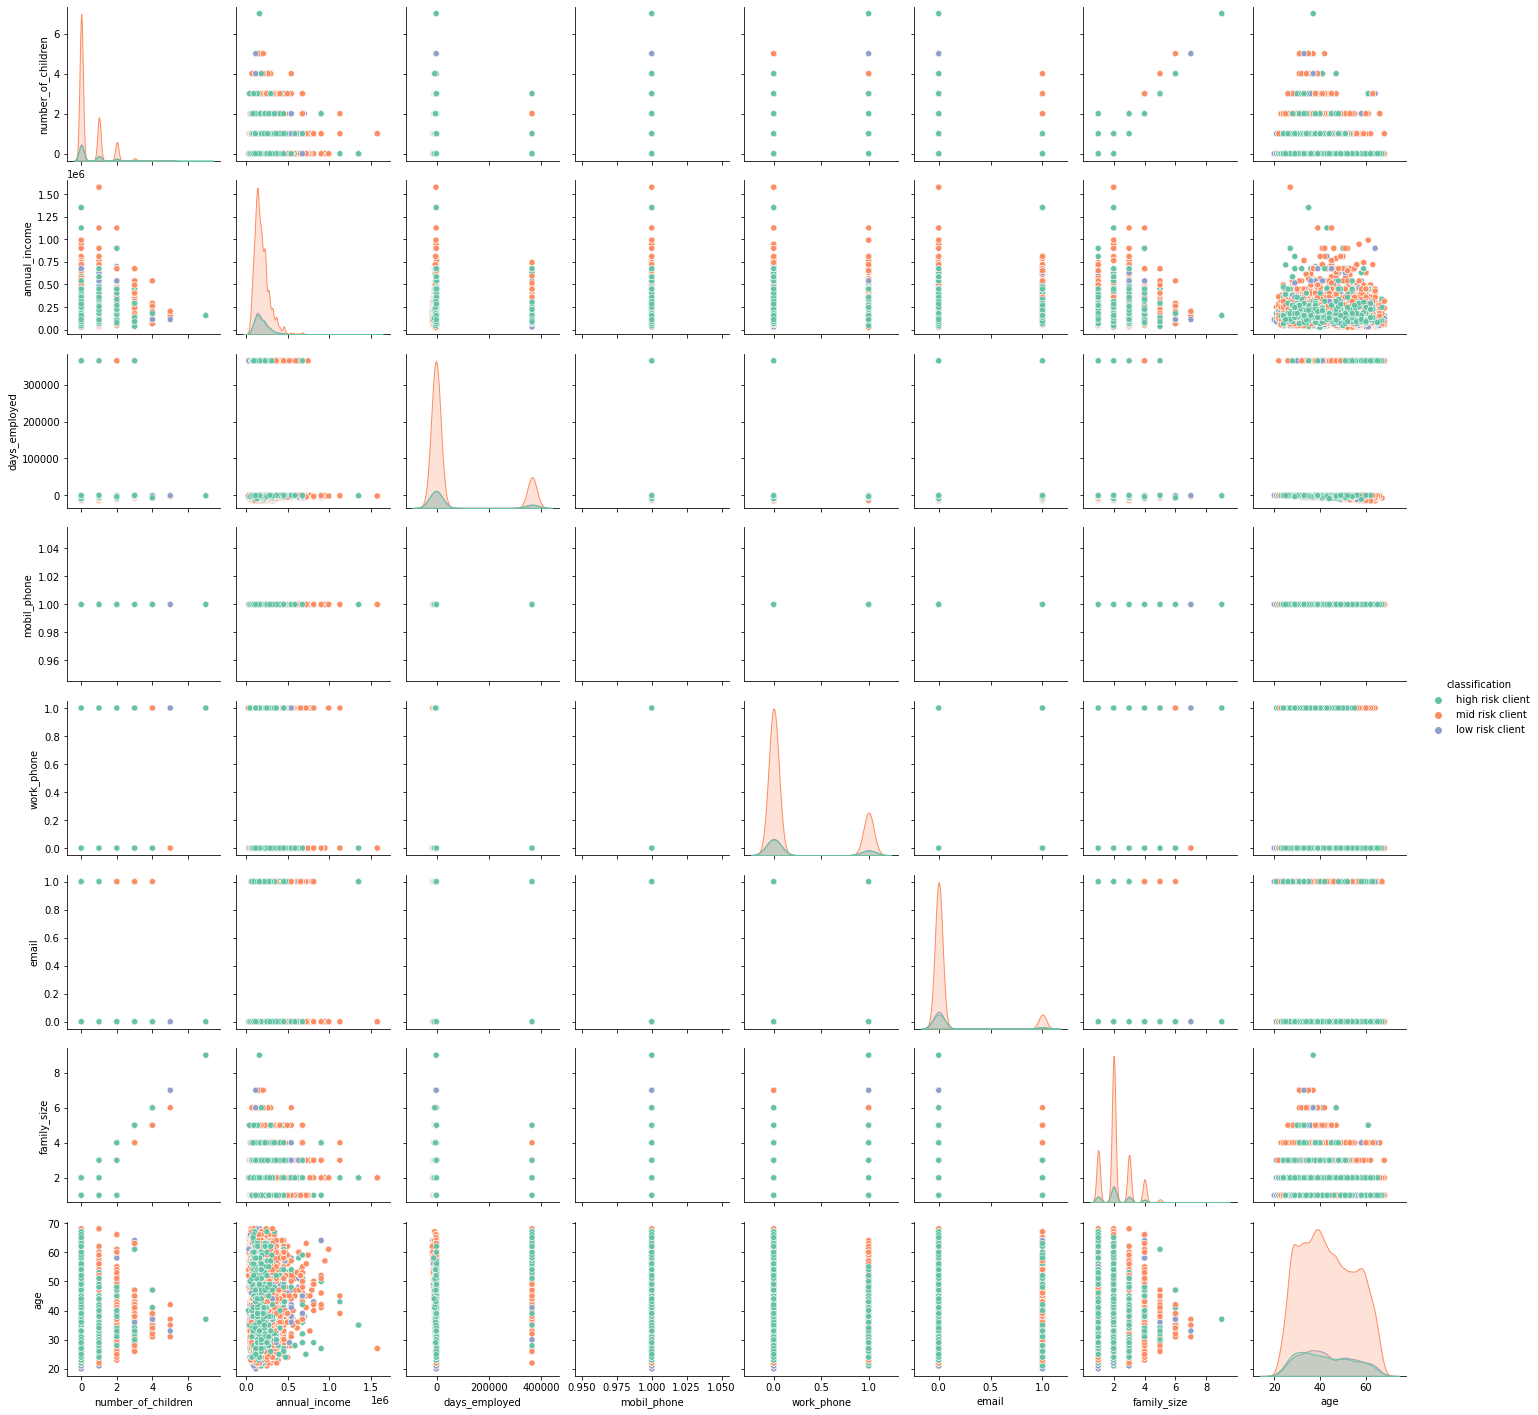

<Figure size 720x432 with 0 Axes>

In [ ]:
#a pair plot to have more visualizations
sns.pairplot(df, hue="classification", palette='Set2')
plt.figure(figsize=(10,6))

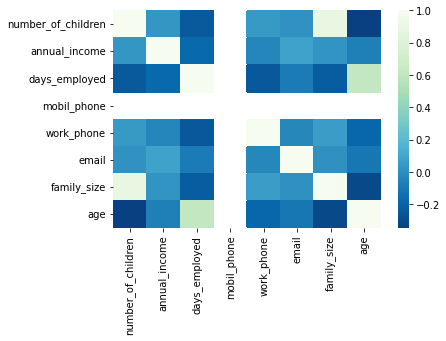

In [ ]:
sns.heatmap(df.corr(), cmap='GnBu_r')

##Encoding

In [ ]:
# 0 -> yes
# 1 -> No


df['car'].replace('Y',0,inplace=True)
df['car'].replace('N',1,inplace=True)

df['owns_a_property'].replace('Y',0,inplace=True)
df['owns_a_property'].replace('N',1,inplace=True)

df['classification'].replace('low risk client',0, inplace=True)
df['classification'].replace('mid risk client',1, inplace=True)
df['classification'].replace('high risk client',2, inplace=True)

Enconding variables - preparing it to the models

In [ ]:
# One-hot encode variables
# Get dummies

#income_category
income_category = pd.get_dummies(df['income_category'], prefix='income_category', drop_first=True)
# Join the datasets
df2 = pd.concat([df, income_category], axis=1)
# Drop the original column
df2 = df2.drop(['income_category'], axis=1)

#education_type
education_type = pd.get_dummies(df['education_type'], prefix='education_type', drop_first=True)
# Join the datasets
df2 = pd.concat([df2, education_type], axis=1)
# Drop the original column
df2 = df2.drop(['education_type'], axis=1)

#maritial_status
maritial_status = pd.get_dummies(df['maritial_status'], prefix='maritial_status', drop_first=True)
# Join the datasets
df2 = pd.concat([df2, maritial_status], axis=1)
# Drop the original column
df2 = df2.drop(['maritial_status'], axis=1)

#housing_type
housing_type = pd.get_dummies(df['housing_type'], prefix='housing_type', drop_first=True)
# Join the datasets
df2 = pd.concat([df2, housing_type], axis=1)
# Drop the original column
df2 = df2.drop(['housing_type'], axis=1)

#occupation_type
occupation_type = pd.get_dummies(df['occupation_type'], prefix='occupation_type', drop_first=True)
# Join the datasets
df2 = pd.concat([df2, occupation_type], axis=1)
# Drop the original column
df2 = df2.drop(['occupation_type'], axis=1)

#gender
gender = pd.get_dummies(df['gender'], prefix='gender', drop_first=True)
# Join the datasets
df2 = pd.concat([df2, gender], axis=1)
# Drop the original column
df2 = df2.drop(['gender'], axis=1)


In [ ]:
df2

,car,owns_a_property,number_of_children,annual_income,days_since_birth,days_employed,mobil_phone,work_phone,email,family_size,classification,age,income_category_Pensioner,income_category_State servant,income_category_Student,income_category_Working,education_type_Higher education,education_type_Incomplete higher,education_type_Lower secondary,education_type_Secondary / secondary special,maritial_status_Married,maritial_status_Separated,maritial_status_Single / not married,maritial_status_Widow,housing_type_House / apartment,housing_type_Municipal apartment,housing_type_Office apartment,housing_type_Rented apartment,housing_type_With parents,occupation_type_Cleaning staff,occupation_type_Cooking staff,occupation_type_Core staff,occupation_type_Drivers,occupation_type_HR staff,occupation_type_High skill tech staff,occupation_type_IT staff,occupation_type_Laborers,occupation_type_Low-skill Laborers,occupation_type_Managers,occupation_type_Medicine staff,occupation_type_Other,occupation_type_Private service staff,occupation_type_Realty agents,occupation_type_Sales staff,occupation_type_Secretaries,occupation_type_Security staff,occupation_type_Waiters/barmen staff,gender_M
0,0,0,0,427500.0,1990-01-22,-4542,1,1,0,2.0,2,32,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,0,0,0,427500.0,1990-01-22,-4542,1,1,0,2.0,2,32,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,0,0,0,112500.0,1964-02-19,-1134,1,0,0,2.0,1,58,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,1,0,0,270000.0,1970-08-10,-3051,1,0,1,1.0,1,52,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,1,0,0,270000.0,1970-08-10,-3051,1,0,1,1.0,0,52,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,0,0,0,315000.0,1975-06-07,-2420,1,0,0,2.0,2,47,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
36453,1,0,0,157500.0,1989-01-05,-1325,1,0,1,2.0,2,33,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
36454,1,0,0,157500.0,1989-01-05,-1325,1,0,1,2.0,2,33,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
36455,1,0,0,283500.0,1973-10-05,-655,1,0,0,2.0,2,49,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
#id and gender are irrelevants, a credit cannot be approved based on gender (however to we will have the gender)
df2 = df2.drop(['days_since_birth', 'occupation_type_HR staff','income_category_Student', 'occupation_type_Low-skill Laborers', 'occupation_type_IT staff', 'occupation_type_Realty agents', 'mobil_phone'], axis=1)

In [ ]:
#selecting the target
df2 = df2.rename(columns={"classification": "target"})

In [ ]:
df2

,car,owns_a_property,number_of_children,annual_income,days_employed,work_phone,email,family_size,target,age,income_category_Pensioner,income_category_State servant,income_category_Working,education_type_Higher education,education_type_Incomplete higher,education_type_Lower secondary,education_type_Secondary / secondary special,maritial_status_Married,maritial_status_Separated,maritial_status_Single / not married,maritial_status_Widow,housing_type_House / apartment,housing_type_Municipal apartment,housing_type_Office apartment,housing_type_Rented apartment,housing_type_With parents,occupation_type_Cleaning staff,occupation_type_Cooking staff,occupation_type_Core staff,occupation_type_Drivers,occupation_type_High skill tech staff,occupation_type_Laborers,occupation_type_Managers,occupation_type_Medicine staff,occupation_type_Other,occupation_type_Private service staff,occupation_type_Sales staff,occupation_type_Secretaries,occupation_type_Security staff,occupation_type_Waiters/barmen staff,gender_M
0,0,0,0,427500.0,-4542,1,0,2.0,2,32,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,0,0,0,427500.0,-4542,1,0,2.0,2,32,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,0,0,0,112500.0,-1134,0,0,2.0,1,58,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,1,0,0,270000.0,-3051,0,1,1.0,1,52,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,1,0,0,270000.0,-3051,0,1,1.0,0,52,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,0,0,0,315000.0,-2420,0,0,2.0,2,47,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
36453,1,0,0,157500.0,-1325,0,1,2.0,2,33,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
36454,1,0,0,157500.0,-1325,0,1,2.0,2,33,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
36455,1,0,0,283500.0,-655,0,0,2.0,2,49,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
df2.describe()

,car,owns_a_property,number_of_children,annual_income,days_employed,work_phone,email,family_size,target,age,income_category_Pensioner,income_category_State servant,income_category_Working,education_type_Higher education,education_type_Incomplete higher,education_type_Lower secondary,education_type_Secondary / secondary special,maritial_status_Married,maritial_status_Separated,maritial_status_Single / not married,maritial_status_Widow,housing_type_House / apartment,housing_type_Municipal apartment,housing_type_Office apartment,housing_type_Rented apartment,housing_type_With parents,occupation_type_Cleaning staff,occupation_type_Cooking staff,occupation_type_Core staff,occupation_type_Drivers,occupation_type_High skill tech staff,occupation_type_Laborers,occupation_type_Managers,occupation_type_Medicine staff,occupation_type_Other,occupation_type_Private service staff,occupation_type_Sales staff,occupation_type_Secretaries,occupation_type_Security staff,occupation_type_Waiters/barmen staff,gender_M
count,36453.000000,36453.000000,36453.000000,3.645300e+04,36453.000000,36453.000000,36453.000000,36453.000000,36453.000000,36453.000000,36453.000000,36453.000000,36453.000000,36453.000000,36453.000000,36453.000000,36453.000000,36453.000000,36453.000000,36453.000000,36453.000000,36453.000000,36453.000000,36453.000000,36453.000000,36453.000000,36453.000000,36453.000000,36453.000000,36453.000000,36453.000000,36453.000000,36453.000000,36453.000000,36453.000000,36453.000000,36453.000000,36453.000000,36453.000000,36453.000000,36453.000000
mean,0.620333,0.327847,0.428689,1.866846e+05,59269.628343,0.225523,0.089732,2.196911,0.995446,43.233204,0.168765,0.081886,0.516144,0.270595,0.038680,0.010260,0.679587,0.687131,0.057608,0.132445,0.042027,0.892766,0.030944,0.007187,0.015774,0.048720,0.015115,0.017968,0.098510,0.058569,0.037939,0.170384,0.082627,0.033111,0.310619,0.009437,0.095603,0.004142,0.016240,0.004746,0.329849
std,0.485311,0.469435,0.725639,1.017935e+05,137657.404215,0.417932,0.285801,0.899489,0.489751,11.503878,0.374550,0.274195,0.499746,0.444273,0.192834,0.100771,0.466642,0.463668,0.233005,0.338978,0.200653,0.309415,0.173168,0.084474,0.124601,0.215286,0.122013,0.132838,0.298008,0.234819,0.191052,0.375975,0.275321,0.178929,0.462753,0.096685,0.294049,0.064228,0.126399,0.068727,0.470165
min,0.000000,0.000000,0.000000,2.700000e+04,-15713.000000,0.000000,0.000000,1.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.215000e+05,-3153.000000,0.000000,0.000000,2.000000,1.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,1.575000e+05,-1552.000000,0.000000,0.000000,2.000000,1.000000,42.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,2.250000e+05,-408.000000,0.000000,0.000000,3.000000,1.000000,53.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,7.000000,1.575000e+06,365243.000000,1.000000,1.000000,9.000000,2.000000,68.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000

# Models

In [ ]:
# Separate in X (variables) and y (target) for modeling
X = df2.drop(['target'], axis=1)
y = df2['target']

In [ ]:
# Split dataset in train and test datasets
#random_state = 21 is assigned for random distribution of data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=21)

In [ ]:
# Scale variables with Standard Scaler
# Models tend to like Normal-like variables

# Need to calculate standardization values only in the train dataset and use it to tranform train and test datasets,
# otherwise we would add leakage.

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train.loc[:,['number_of_children', 'annual_income', 'days_employed','family_size', 'age']] = scaler.fit_transform(X_train[['number_of_children', 'annual_income', 'days_employed','family_size', 'age']])
X_test.loc[:,['number_of_children', 'annual_income', 'days_employed','family_size','age']] = scaler.fit_transform(X_test[['number_of_children', 'annual_income', 'days_employed','family_size', 'age']])

Scale with Standard Scaler

Models tend to like Normal-like variables Need to calculate standardization values only in the train dataset and use it to tranform train and test datasets, otherwise we would add leakage.

In [ ]:
# check both datasets have the same distribution
y_train.value_counts(normalize=True), y_test.value_counts(normalize=True)

(1    0.760317
 0    0.122036
 2    0.117647
 Name: target, dtype: float64, 1    0.759693
 0    0.122623
 2    0.117685
 Name: target, dtype: float64)

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier

# Fit models to training dataset

clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt.fit(X_train, y_train)

clf_rf = RandomForestClassifier(random_state=42)
clf_rf.fit(X_train, y_train)

clf_svm = SVC(kernel='linear', decision_function_shape='ovo')
clf_svm.fit(X_train, y_train)

clf_nb = GaussianNB()
clf_nb.fit(X_train, y_train)

clf_knn = KNeighborsClassifier()
clf_knn.fit(X_train, y_train)

clf_ada = AdaBoostClassifier(base_estimator = clf_dt, random_state=42)
clf_ada.fit(X_train, y_train);

In [ ]:
# Can get more performance metrics from classification_report
from sklearn.metrics import classification_report
# Check for Random forest model
y_pred_rf = clf_rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.55      0.29      0.38      1341
           1       0.81      0.93      0.87      8308
           2       0.51      0.26      0.35      1287

    accuracy                           0.78     10936
   macro avg       0.62      0.50      0.53     10936
weighted avg       0.74      0.78      0.75     10936



In [ ]:
# Check for Support Vector Machines
y_pred_svm = clf_svm.predict(X_test)
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1341
           1       0.76      1.00      0.86      8308
           2       0.00      0.00      0.00      1287

    accuracy                           0.76     10936
   macro avg       0.25      0.33      0.29     10936
weighted avg       0.58      0.76      0.66     10936



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Check for Naive Bayes model
y_pred_nb = clf_nb.predict(X_test)
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.17      0.02      0.03      1341
           1       0.76      0.82      0.79      8308
           2       0.14      0.21      0.17      1287

    accuracy                           0.65     10936
   macro avg       0.36      0.35      0.33     10936
weighted avg       0.62      0.65      0.62     10936



In [ ]:
#Check for KNN
y_pred_knn = clf_knn.predict(X_test)
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.42      0.28      0.34      1341
           1       0.80      0.92      0.85      8308
           2       0.41      0.17      0.24      1287

    accuracy                           0.75     10936
   macro avg       0.54      0.46      0.48     10936
weighted avg       0.71      0.75      0.72     10936



In [ ]:
# Check for DecisionTree model
y_pred_dt = clf_dt.predict(X_test)
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.34      0.34      0.34      1341
           1       0.81      0.85      0.83      8308
           2       0.34      0.23      0.28      1287

    accuracy                           0.71     10936
   macro avg       0.50      0.47      0.48     10936
weighted avg       0.70      0.71      0.70     10936



In [ ]:
# Check for ADABOOST model
y_pred_ada = clf_ada.predict(X_test)
print(classification_report(y_test, y_pred_ada))

              precision    recall  f1-score   support

           0       0.48      0.22      0.30      1341
           1       0.80      0.93      0.86      8308
           2       0.40      0.20      0.26      1287

    accuracy                           0.75     10936
   macro avg       0.56      0.45      0.47     10936
weighted avg       0.71      0.75      0.72     10936



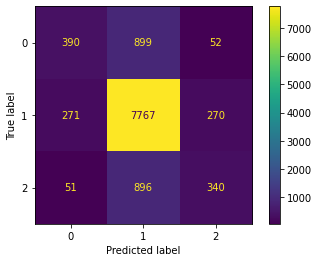

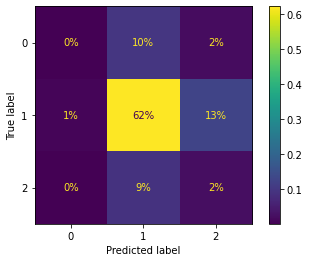

In [ ]:
# And we can print the confusion matrix as well
from sklearn.metrics import ConfusionMatrixDisplay
# Check for Light RF model
ConfusionMatrixDisplay.from_estimator(clf_rf, X_test, y_test)
# Check for Naive Bayes model
ConfusionMatrixDisplay.from_estimator(clf_nb, X_test, y_test, normalize='all', values_format='.0%')

## Smote

In [ ]:
# check both datasets have the same distribution
y_train.value_counts(normalize=True), y_test.value_counts(normalize=True)

(1    0.760317
 0    0.122036
 2    0.117647
 Name: target, dtype: float64, 1    0.759693
 0    0.122623
 2    0.117685
 Name: target, dtype: float64)

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=1)
X_smote, y_smote = sm.fit_resample(X_train, y_train)

In [ ]:
np.bincount(y_smote)
#Now our training set has class balance, thanks to synthetic oversampling of minority class.

array([19401, 19401, 19401])

In [ ]:
# check both datasets have the same distribution
y_smote.value_counts(normalize=True), y_test.value_counts(normalize=True)

(1    0.333333
 2    0.333333
 0    0.333333
 Name: target, dtype: float64, 1    0.759693
 0    0.122623
 2    0.117685
 Name: target, dtype: float64)

In [ ]:
# Fit models to training dataset
clf_rf_smote = RandomForestClassifier(random_state=0)
clf_rf_smote.fit(X_smote, y_smote)

clf_svm_smote = SVC(kernel='linear')
clf_svm_smote.fit(X_smote, y_smote)

clf_nb_smote = GaussianNB()
clf_nb_smote.fit(X_smote, y_smote)

clf_knn_smote = KNeighborsClassifier()
clf_knn_smote.fit(X_smote, y_smote)

clf_dt_smote = DecisionTreeClassifier(random_state=0)
clf_dt_smote.fit(X_smote, y_smote)

clf_ada_smote = AdaBoostClassifier(random_state=42)
clf_ada_smote.fit(X_smote, y_smote);

In [ ]:
y_pred_rf_smote = clf_rf_smote.predict(X_test)
y_pred_svm_smote = clf_svm_smote.predict(X_test)
y_pred_nb_smote = clf_nb_smote.predict(X_test)
y_pred_knn_smote = clf_knn_smote.predict(X_test)
y_pred_dt_smote = clf_dt_smote.predict(X_test)
y_pred_ada_smote = clf_ada_smote.predict(X_test)

In [ ]:
#Checking Random Forest results
print(classification_report(y_test, y_pred_rf_smote))

              precision    recall  f1-score   support

           0       0.34      0.50      0.40      1341
           1       0.86      0.73      0.79      8308
           2       0.32      0.48      0.38      1287

    accuracy                           0.67     10936
   macro avg       0.51      0.57      0.53     10936
weighted avg       0.73      0.67      0.69     10936



In [ ]:
#Checking SVM results
print(classification_report(y_test, y_pred_svm_smote))

              precision    recall  f1-score   support

           0       0.17      0.03      0.05      1341
           1       0.76      0.95      0.85      8308
           2       0.16      0.04      0.06      1287

    accuracy                           0.73     10936
   macro avg       0.36      0.34      0.32     10936
weighted avg       0.62      0.73      0.66     10936



In [ ]:
#Checking Gaussian NB results
print(classification_report(y_test, y_pred_nb_smote))

              precision    recall  f1-score   support

           0       0.12      0.64      0.21      1341
           1       0.76      0.15      0.25      8308
           2       0.13      0.24      0.17      1287

    accuracy                           0.22     10936
   macro avg       0.34      0.34      0.21     10936
weighted avg       0.61      0.22      0.24     10936



In [ ]:
#Checking knn results
print(classification_report(y_test, y_pred_knn_smote))

              precision    recall  f1-score   support

           0       0.30      0.50      0.38      1341
           1       0.85      0.69      0.76      8308
           2       0.30      0.46      0.36      1287

    accuracy                           0.64     10936
   macro avg       0.48      0.55      0.50     10936
weighted avg       0.72      0.64      0.67     10936



In [ ]:
#Checking Decision trees results
print(classification_report(y_test, y_pred_dt_smote))

              precision    recall  f1-score   support

           0       0.17      0.47      0.25      1341
           1       0.83      0.34      0.48      8308
           2       0.16      0.48      0.24      1287

    accuracy                           0.37     10936
   macro avg       0.39      0.43      0.32     10936
weighted avg       0.67      0.37      0.42     10936



In [ ]:
#Checking Adaboos results
print(classification_report(y_test, y_pred_ada_smote))

              precision    recall  f1-score   support

           0       0.12      0.43      0.19      1341
           1       0.76      0.27      0.40      8308
           2       0.13      0.34      0.19      1287

    accuracy                           0.30     10936
   macro avg       0.34      0.34      0.26     10936
weighted avg       0.61      0.30      0.35     10936



## Smote Tomek Links

In [ ]:
from imblearn.combine import SMOTETomek
sm = SMOTETomek(random_state=1)
X_st, y_st = sm.fit_resample(X_train, y_train)






In [ ]:
np.bincount(y_st)

array([19056, 19138, 19061])

In [ ]:
# check both datasets have the same distribution
y_st.value_counts(), y_test.value_counts()

(1    19138
 2    19061
 0    19056
 Name: target, dtype: int64, 1    8308
 0    1341
 2    1287
 Name: target, dtype: int64)

In [ ]:
# Fit models to training dataset

clf_dt_st = DecisionTreeClassifier(random_state=42)
clf_dt_st.fit(X_st, y_st)

clf_rf_st = RandomForestClassifier(random_state=42)
clf_rf_st.fit(X_st, y_st)

clf_svm_st = SVC(kernel='linear', decision_function_shape='ovo')
clf_svm_st.fit(X_st, y_st)

clf_nb_st = GaussianNB()
clf_nb_st.fit(X_st, y_st)

clf_knn_st = KNeighborsClassifier()
clf_knn_st.fit(X_st, y_st)

clf_ada_st = AdaBoostClassifier(base_estimator = clf_dt_st, random_state=42)
clf_ada_st.fit(X_st, y_st);

In [ ]:
y_pred_rf_st = clf_rf_st.predict(X_test)
y_pred_svm_st = clf_svm_st.predict(X_test)
y_pred_nb_st = clf_nb_st.predict(X_test)
y_pred_knn_st = clf_knn_st.predict(X_test)
y_pred_dt_st = clf_dt_st.predict(X_test)
y_pred_ada_st = clf_ada_st.predict(X_test)

In [ ]:
#Checking Random Forest results
print(classification_report(y_test, y_pred_rf_st))

              precision    recall  f1-score   support

           0       0.34      0.51      0.41      1341
           1       0.86      0.73      0.79      8308
           2       0.33      0.48      0.39      1287

    accuracy                           0.67     10936
   macro avg       0.51      0.57      0.53     10936
weighted avg       0.73      0.67      0.70     10936



In [ ]:
#Checking SVM results
print(classification_report(y_test, y_pred_svm_st))

              precision    recall  f1-score   support

           0       0.17      0.03      0.05      1341
           1       0.76      0.95      0.85      8308
           2       0.16      0.04      0.06      1287

    accuracy                           0.73     10936
   macro avg       0.36      0.34      0.32     10936
weighted avg       0.62      0.73      0.66     10936



In [ ]:
#Checking Gaussian NB results
print(classification_report(y_test, y_pred_nb_st))

              precision    recall  f1-score   support

           0       0.12      0.63      0.21      1341
           1       0.76      0.15      0.25      8308
           2       0.13      0.24      0.17      1287

    accuracy                           0.22     10936
   macro avg       0.34      0.34      0.21     10936
weighted avg       0.61      0.22      0.24     10936



In [ ]:
#Checking KNN results
print(classification_report(y_test, y_pred_knn_st))

              precision    recall  f1-score   support

           0       0.30      0.50      0.38      1341
           1       0.85      0.69      0.76      8308
           2       0.31      0.46      0.37      1287

    accuracy                           0.64     10936
   macro avg       0.49      0.55      0.50     10936
weighted avg       0.72      0.64      0.67     10936



In [ ]:
#Checking Decision trees results
print(classification_report(y_test, y_pred_dt_st))

              precision    recall  f1-score   support

           0       0.17      0.46      0.25      1341
           1       0.82      0.34      0.49      8308
           2       0.16      0.46      0.24      1287

    accuracy                           0.37     10936
   macro avg       0.38      0.42      0.32     10936
weighted avg       0.67      0.37      0.43     10936



In [ ]:
#Checking Adaboost results
print(classification_report(y_test, y_pred_ada_st))

              precision    recall  f1-score   support

           0       0.22      0.52      0.31      1341
           1       0.85      0.47      0.61      8308
           2       0.20      0.50      0.29      1287

    accuracy                           0.48     10936
   macro avg       0.42      0.50      0.40     10936
weighted avg       0.70      0.48      0.53     10936



Because the procedure only removes so-named “Tomek Links“, we would not expect the resulting transformed dataset to be balanced, only less ambiguous along the class boundary.

## Hyper-parameter Tuning

In [ ]:
# Optimize the performance using a Grid-search and Cross-validation strategy
# to search the best configurations (model and hyperparameters)
# This step takes a lot of time as it does an exasutive search of the parameters we selected for search

from sklearn.dummy import DummyClassifier
from sklearn.pipeline import Pipeline

# Create a dummy classifier for building the pipeline
pipe = Pipeline([('classifier', DummyClassifier())])

# Create space of candidate models and some of their hyperparameters
search_space = [{'classifier': [DecisionTreeClassifier(random_state=0)],
                 'classifier__max_leaf_nodes': [3, 5, 50, 100,],
                 'classifier__max_depth': [None,3, 5, 10]},
                {'classifier': [RandomForestClassifier(random_state=0,bootstrap=False)],
                 'classifier__n_estimators': [5, 10, 50, 100],
                 'classifier__max_features': [2, 3, 4, 7],
                 'classifier__min_samples_leaf': [3, 4, 5, 9],
                 'classifier__max_depth': [None, 3, 5, 10, 20]},
                {'classifier': [AdaBoostClassifier(random_state=42)],
                 'classifier__n_estimators': [5, 10, 30, 50],
                 'classifier__learning_rate': [0.01, 0.1, 1.0]}]



# Search the space in a grid-like approach, selecting at the end the model with the best F1 score
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(pipe, search_space, cv=10, verbose=0, scoring='f1_weighted')
best_model = gs.fit(X_smote, y_smote)

# See which model was the best
best_model.best_estimator_.get_params()['classifier']

RandomForestClassifier(bootstrap=False, max_features=7, min_samples_leaf=3,
                       random_state=0)

In [ ]:
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.31      0.53      0.39      1341
           1       0.86      0.67      0.75      8308
           2       0.30      0.50      0.37      1287

    accuracy                           0.63     10936
   macro avg       0.49      0.57      0.51     10936
weighted avg       0.73      0.63      0.66     10936



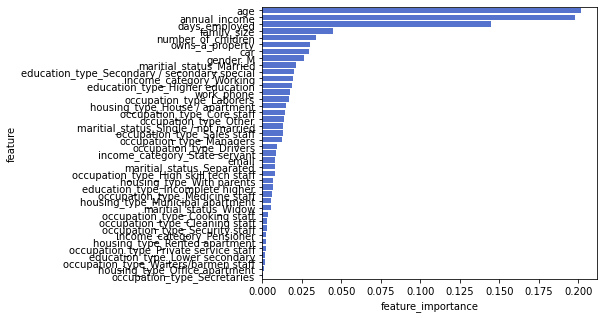

In [ ]:
# See which features are most important for the best model, in this case was a Random Forest model

df_feat = pd.DataFrame({'feature': X_test.columns,
                        'feature_importance': best_model.best_estimator_.named_steps["classifier"].feature_importances_}) \
                        .sort_values('feature_importance', ascending=False) \
                        .reset_index(drop=True)
plt.figure(figsize=(6, 5))
sns_feats = sns.barplot(x='feature_importance', y='feature', data=df_feat, orient='h', color='royalblue')

## ANN

In [ ]:
# Installation if needed
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 575 kB 4.8 MB/s 


In [ ]:
import tensorflow.compat.v1.keras.backend as K # To solve a current problem with SHAP library
import tensorflow as tf
tf.compat.v1.disable_eager_execution() # To solve a current problem with SHAP library

In [ ]:
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical
l_encode = LabelEncoder()
l_encode.fit(y)
Y = l_encode.transform(y)
Y = to_categorical(Y)
Y

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [ ]:
# Split dataset in train and test datasets
#random_state = 21 is assigned for random distribution of data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=21)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Define the scaler
scaler = MinMaxScaler().fit(X_train)

# Scale the train set
X_train = scaler.transform(X_train)

# Scale the test set
X_test = scaler.transform(X_test)

In [ ]:
#Create validation sample
X_train, X_val, y_train, y_val=train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [ ]:
X_train.shape

(20413, 40)

In [ ]:
X_val.shape

(5104, 40)

In [ ]:
print(y_val)

[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 ...
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]]


In [ ]:

import tensorflow as tf
# Import Sequential model and Dense layer
from tensorflow.keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

model = Sequential()
# Add an input layer
model.add(Dense(41, activation='relu', input_shape=(40,)))

# Add one hidden layer
model.add(Dense(26, activation='relu'))

# Add an output layer
model.add(Dense(3, activation='softmax'))

In [ ]:
# Check model output shape
model.output_shape

(None, 3)

In [ ]:
# Check model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 41)                1681      
                                                                 
 dense_1 (Dense)             (None, 26)                1092      
                                                                 
 dense_2 (Dense)             (None, 3)                 81        
                                                                 
Total params: 2,854
Trainable params: 2,854
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Check model config
model.get_config()

{'name': 'sequential',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 40),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_input'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense',
    'trainable': True,
    'batch_input_shape': (None, 40),
    'dtype': 'float32',
    'units': 41,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_1',
    'trainable': True,
    'dtype': 'float32',
    'units': 26,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initia

In [ ]:
# List all weight tensors
model.get_weights()

[array([[ 0.21849856, -0.01023623,  0.15220979, ..., -0.07922207,
          0.10587257, -0.02310391],
        [-0.19428971, -0.07747869,  0.25271088, ..., -0.12850791,
          0.02068171, -0.12042315],
        [ 0.18283552,  0.02698255,  0.04056135, ..., -0.21059212,
         -0.06271066,  0.0701828 ],
        ...,
        [ 0.15149319,  0.2041085 , -0.23543721, ...,  0.1540756 ,
         -0.07264665,  0.13388413],
        [ 0.23292524, -0.00178257, -0.25681505, ..., -0.22209823,
         -0.2155243 , -0.04944274],
        [ 0.1677145 , -0.04457586, -0.22536586, ..., -0.13962242,
         -0.22787404,  0.02138481]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.03335878,  0.12974003, -0.02126402, ...,  0.23139489,
         -0.08803089,  0.16288248],
        [-0.05818796, -0.06173787,  0.1929084 , ...

In [ ]:
# Config the model with the loss, optimizer and metric
model.compile(loss="categorical_crossentropy",
             optimizer='adam',
             metrics=['accuracy'])

In [ ]:
print(y_val)

[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 ...
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]]


In [ ]:
# Train the model
#callback=tf.KerasClassifier.callbacks.EarlyStopping(monitor='loss', patience=3)
history = model.fit(X_train, y_train, epochs=10, batch_size=20, verbose=1, validation_data=(X_val,y_val))

Train on 20413 samples, validate on 5104 samples
Epoch 1/10
20100/20413 [============================>.] - ETA: 0s - loss: 0.7299 - accuracy: 0.7534

/usr/local/lib/python3.8/dist-packages/keras/engine/training_v1.py:2045: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


20413/20413 [==============================] - 2s 121us/sample - loss: 0.7287 - accuracy: 0.7540 - val_loss: 0.7171 - val_accuracy: 0.7616
Epoch 2/10
20413/20413 [==============================] - 3s 138us/sample - loss: 0.7135 - accuracy: 0.7600 - val_loss: 0.7119 - val_accuracy: 0.7616
Epoch 3/10
20413/20413 [==============================] - 3s 154us/sample - loss: 0.7106 - accuracy: 0.7600 - val_loss: 0.7098 - val_accuracy: 0.7616
Epoch 4/10
20413/20413 [==============================] - 3s 168us/sample - loss: 0.7064 - accuracy: 0.7601 - val_loss: 0.7100 - val_accuracy: 0.7614
Epoch 5/10
20413/20413 [==============================] - 3s 139us/sample - loss: 0.7023 - accuracy: 0.7599 - val_loss: 0.7089 - val_accuracy: 0.7604
Epoch 6/10
20413/20413 [==============================] - 3s 146us/sample - loss: 0.6992 - accuracy: 0.7602 - val_loss: 0.7081 - val_accuracy: 0.7612
Epoch 7/10
20413/20413 [==============================] - 3s 158us/sample - loss: 0.6953 - accuracy: 0.7603 - v

In [ ]:
scores = model.evaluate(X_test, y_test)
print(scores)

[0.7129959871756743, 0.7608815]


Text(0, 0.5, 'Validation Loss')

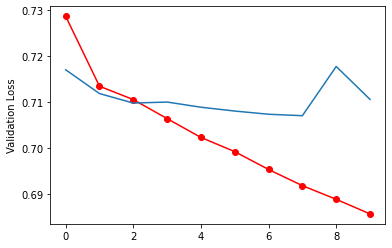

In [ ]:
ax = plt.gca()
ax.plot(history.epoch, history.history["loss"], "ro-")
ax.plot(history.epoch, history.history["val_loss"])
ax.set_ylabel('Validation Loss')

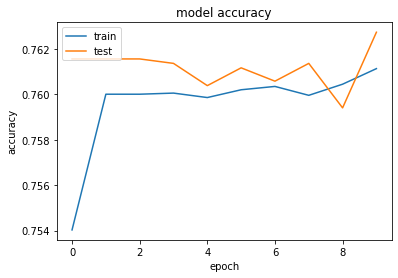

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

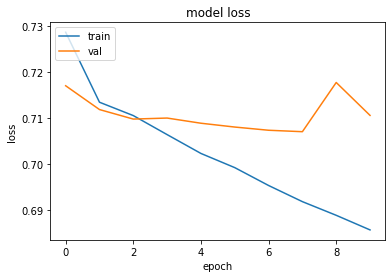

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
# Predict for the test set
y_pred_DL = model.predict(X_test)
print(y_pred_DL)

/usr/local/lib/python3.8/dist-packages/keras/engine/training_v1.py:2067: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


[[0.04014447 0.921062   0.03879351]
 [0.1347488  0.5630496  0.3022015 ]
 [0.06637599 0.8723653  0.06125875]
 ...
 [0.10162028 0.8326634  0.06571638]
 [0.16093343 0.70616865 0.13289799]
 [0.09329396 0.8227758  0.08393029]]


In [ ]:
#ANN Prediction test
test_size = 20
pred = model.predict(X_test[:test_size])
pred_ = np.argmax(to_categorical(pred), axis = 1)
pred_ = l_encode.inverse_transform(pred_)

true_y = l_encode.inverse_transform(np.argmax(to_categorical(y_test[:test_size]), axis = 1)[:,1])

for i,j in zip(pred_, true_y):
    print("Predicted: {}, True: {}".format(i, j))

Predicted: 0, True: 1
Predicted: 0, True: 2
Predicted: 0, True: 1
Predicted: 0, True: 1
Predicted: 0, True: 2
Predicted: 0, True: 2
Predicted: 0, True: 0
Predicted: 0, True: 1
Predicted: 0, True: 0
Predicted: 0, True: 0
Predicted: 0, True: 1
Predicted: 0, True: 1
Predicted: 0, True: 1
Predicted: 0, True: 1
Predicted: 0, True: 1
Predicted: 0, True: 1
Predicted: 0, True: 1
Predicted: 0, True: 1
Predicted: 0, True: 1
Predicted: 0, True: 1


/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:154: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
